In [1]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train/"

C:\Users\hasti\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hasti\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hasti\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hasti\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\frame

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 64)      2368      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 256)      

In [29]:
import ultrasoundgeneration
import importlib
importlib.reload(ultrasoundgeneration)

import os
def load_dataset(path):
    dataset = ultrasoundgeneration.generate_data(path, os.listdir(path))

    data = []
    classes = []
    for elem in dataset:
        data_entry = np.array(np.stack(elem["data"], axis=-1), dtype=np.float32)
        data_entry += 1000
        data_entry /= 2000
        data.append(data_entry)

        class_entry = elem["classes"]
        class_entry = np.concatenate([class_entry[0] / 4, class_entry[1].flatten() * 40])
        class_entry[[3, 7, 11]] -= 40
        classes.append(class_entry)
    data = np.array(data)
    classes = np.array(classes)
    return data, classes
tdata, tclasses = load_dataset(ultrasoundgeneration.test_volumes_path)

In [ ]:
while True:
    data, classes = load_dataset(ultrasoundgeneration.train_volumes_path)
    model.fit(data, 
          classes,
          batch_size=512,
          epochs=1,
          verbose=1,
          validation_data=(tdata[:256], tclasses[:256]))

In [30]:
45

Train on 34816 samples, validate on 256 samples
34816/34816 [==============================] - 21s 600us/sample - loss: 0.8661 - val_loss: 0.7992


In [24]:
"""
import random
for _ in range(20):
    print("===========")
    random.shuffle(names)
    for name in names:
        print(name)
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=512,
              epochs=1,
              verbose=1,
              validation_data=(tdata[:256], tclasses[:256]))"""

TypeError: load_dataset() takes 0 positional arguments but 1 was given

In [16]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))

In [44]:
rclasses = model.predict(tdata[:2000])

In [45]:
tdata.shape

(4096, 128, 128, 4)

In [46]:
tclasses[0]

array([-3.02980727, -1.38783131,  0.51933343, -0.03530942, -0.26483717,
       -1.65932766,  0.30424001, -0.01232988,  0.94534476,  1.65255711,
       -0.95713111, -0.04561407])

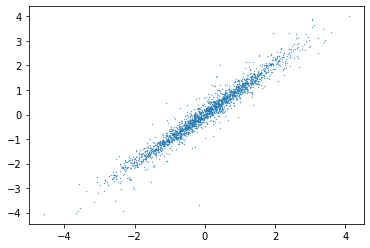

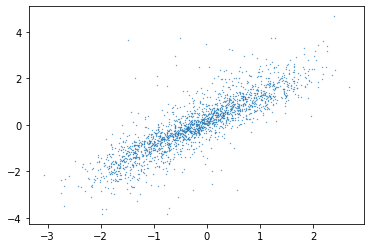

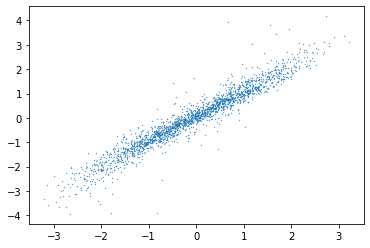

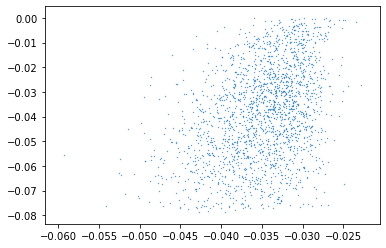

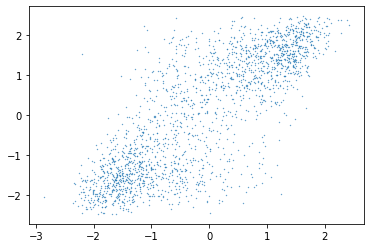

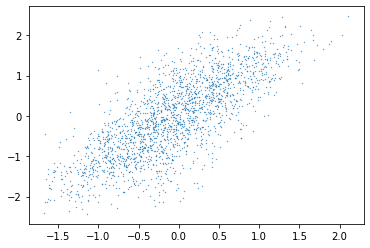

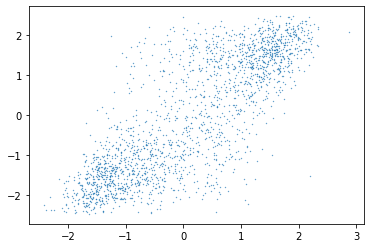

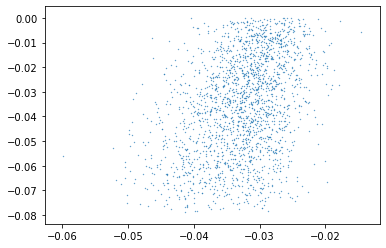

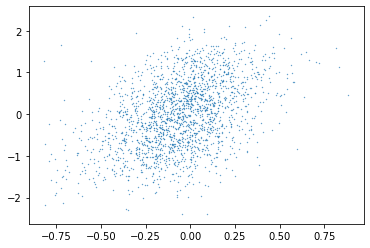

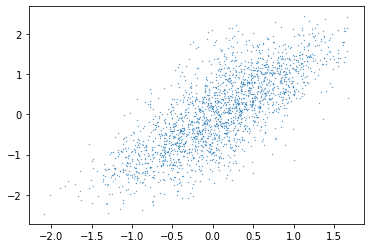

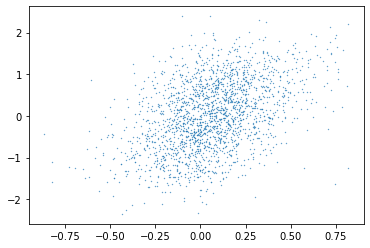

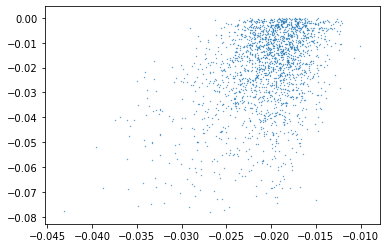

In [47]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:2000, j], s=.1)
    plt.show()

In [86]:
#model.save("naive_network_weights")

In [3]:
import matplotlib

In [4]:
plt.scatter?

Object `plt.scatter` not found.


In [4]:
import tensorflow
tensorflow.test.is_gpu_available()

True

In [29]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [1]:
import sys
sys.executable

'/home/hastings/anaconda3/envs/stylegan/bin/python'

In [38]:
#with open("prepped_data/chunk0.pickle", 'wb') as c0:
#    pickle.dump([data, classes], c0, protocol=4)

In [3]:
import pickle
data, classes = pickle.load(open("prepped_data/chunk0.pickle", "rb"))

In [42]:
data.dtype


dtype('float32')